<a href="https://colab.research.google.com/github/JYoung998/Quant-Projects/blob/main/MonteCarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas numpy yfinance--0.2.50

ERROR: Could not find a version that satisfies the requirement yfinance--0.2.50 (from versions: none)
ERROR: No matching distribution found for yfinance--0.2.50


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

symbol = 'AMZN'
start_date = '2022-01-01'
end_date = '2025-01-01'

stock_data = yf.download(symbol, start=start_date, end=end_date)['Close']

daily_returns = stock_data.pct_change().dropna()

num_simulations = 1000
num_days = 252

mu = daily_returns.mean()
sigma = daily_returns.std()

last_price = stock_data.iloc[-1].item()

random_returns = np.random.normal(mu, sigma, (num_days, num_simulations))

cumulative_returns = np.cumprod(1 + random_returns, axis=0)

simulated_prices = last_price * cumulative_returns

final_prices = simulated_prices[:, -1]


/tmp/ipython-input-2257395746.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


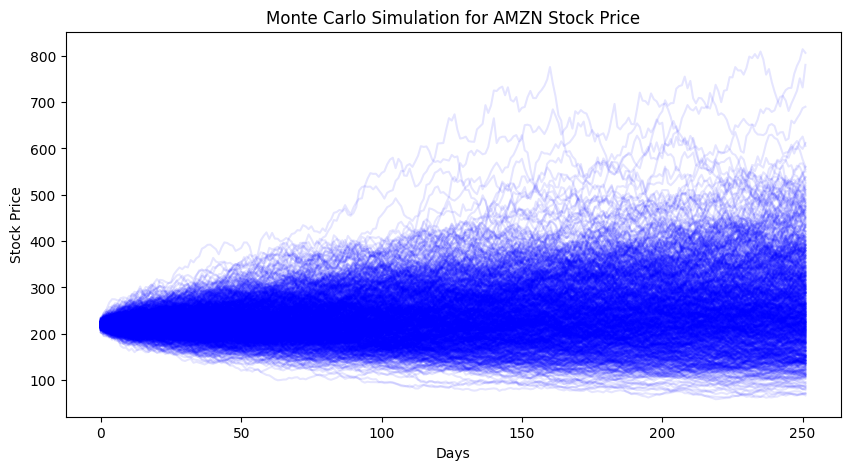

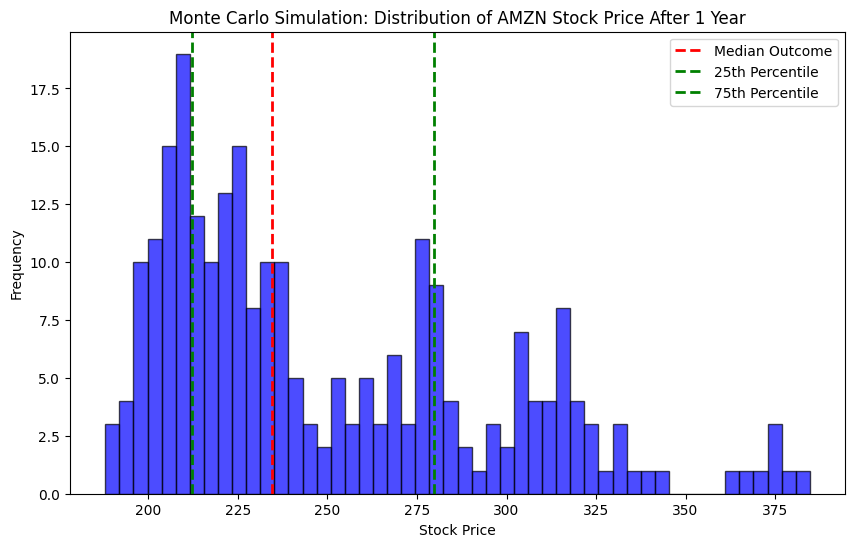

Most probable stock price for AMZN after 1 year: $207.61


In [6]:
# Plot the simulation results
plt.figure(figsize=(10, 5))
plt.plot(simulated_prices, alpha=0.1, color='blue')
plt.title(f"Monte Carlo Simulation for {symbol} Stock Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(x=np.median(final_prices), color='red', linestyle='dashed', linewidth=2,
label="Median Outcome")
plt.axvline(x=np.percentile(final_prices, 25), color='green', linestyle='dashed', linewidth=2,
label="25th Percentile")
plt.axvline(x=np.percentile(final_prices, 75), color='green', linestyle='dashed', linewidth=2,
label="75th Percentile")
plt.title(f"Monte Carlo Simulation: Distribution of {symbol} Stock Price After 1 Year")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

hist_counts, hist_bins = np.histogram(final_prices, bins=50)
most_probable_price = hist_bins[np.argmax(hist_counts)]

print(f"Most probable stock price for {symbol} after 1 year: ${most_probable_price:.2f}")